In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

from te_pai import Hamiltonian, resample, TE_PAI, Trotter


The number of qubit:5
Number of terms in the Hamiltonian:20


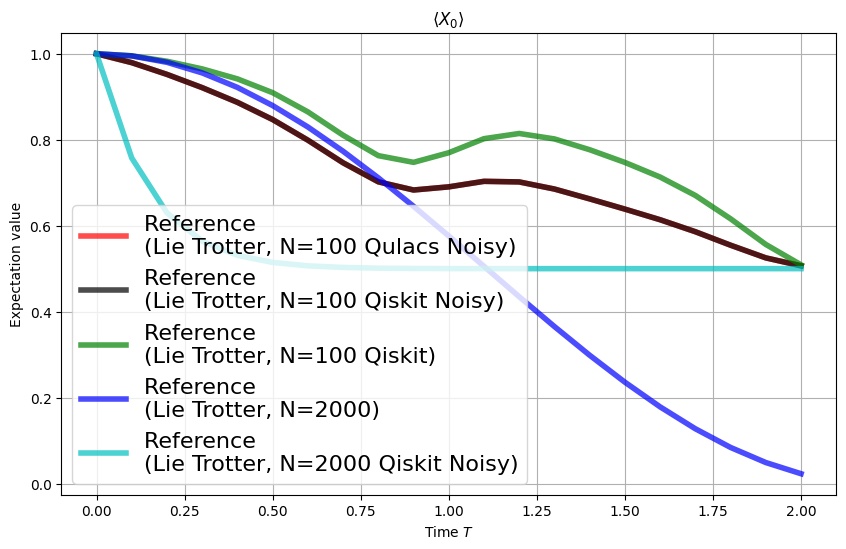

In [11]:
numQs = 5
T = 2
n_snaps = 20
freqs = np.loadtxt("hamil_coef.csv", delimiter=",")
hamil = Hamiltonian.spin_chain_hamil(numQs, freqs, 99)
res1 = Trotter(hamil, numQs, T, 100, n_snaps, "qulacs").run([0.0001,0.001])
res2 = Trotter(hamil, numQs, T, 100, n_snaps, "qiskit").run([0.0001,0.001])
res3 = Trotter(hamil, numQs, T, 100, n_snaps).run()
res4 = Trotter(hamil, numQs, T, 2000, n_snaps).run()
res5 = Trotter(hamil, numQs, T, 2000, n_snaps,"qiskit").run([0.0001,0.001])
for res in [res1, res2, res3, res4,res5]:
    res = [2 * x - 1 for x in res]
x = np.linspace(0, T, n_snaps + 1)
plt.figure(figsize=(10, 6))

plt.plot(
    x, res1, "r-", alpha=0.7, label="Reference \n(Lie Trotter, N=100 Qulacs Noisy)", linewidth=4
)
plt.plot(
    x, res2, "k-", alpha=0.7, label="Reference \n(Lie Trotter, N=100 Qiskit Noisy)", linewidth=4
)
plt.plot(
    x, res3, "g-", alpha=0.7, label="Reference \n(Lie Trotter, N=100 Qiskit)", linewidth=4
)

plt.plot(
    x, res4, "b-", alpha=0.7, label="Reference \n(Lie Trotter, N=2000)", linewidth=4
)

plt.plot(
    x, res5, "c-", alpha=0.7, label="Reference \n(Lie Trotter, N=2000 Qiskit Noisy)", linewidth=4
)

plt.title("$\\langle X_0 \\rangle$")
plt.xlabel("Time $T$")
plt.ylabel("Expectation value")
plt.legend(fontsize=16)
plt.grid(True)
